In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [92]:
df_subset['Parameter'].value_counts

Dissolved Oxygen, Field               45791
Chlorophyll, Field                    39437
Nitrite + Nitrate Nitrogen            39222
Orthophosphate Phosphorus             30772
Conductivity, Field                   29323
Total Suspended Solids                29230
Silica                                25175
Total Phosphorus                      24258
Ammonia Nitrogen                      22938
Total Nitrogen                        21906
Chlorophyll a                         21365
Light Transmissivity                  16370
Pheophytin a                          15944
Total Alkalinity                       8395
Turbidity                              7688
Total Organic Carbon                   6569
Salinity                               6106
Dissolved Oxygen                       4706
Dissolved Oxygen Saturation, Field     4143
Dissolved Organic Carbon               1892
Hardness, Calc                          739
BGA PC, Field                           454
Conductivity                    

In [5]:
df_subset['Site Type'].value_counts()

Large Lakes        202519
Marine Offshore    200364
Name: Site Type, dtype: int64

In [44]:
len(set(df_subset['Sample Number'].value_counts()))

13

In [47]:
len(set(df_subset['Sample Number'].values))

75817

In [74]:
sample_dict = dict(df_subset['Sample Number'].value_counts() < 4)
true_count=0
false_count=0
for each in sample_dict:

  if sample_dict[each] == True:
    true_count+=1
  else:
    false_count+=1
  # break
print('True cout is {}and false count is {}'.format(true_count,false_count))

True cout is 30448and false count is 45369


In [77]:
df_sample = df_subset[df_subset['Sample Number']=='L61438-25']

In [79]:
df_sample[['Parameter','Units','Value','MDL','RDL','Method']]

,Parameter,Units,Value,MDL,RDL,Method
40541,Dissolved Oxygen,mg/L,5.300,0.100,0.50,SM4500-O-C
100601,Salinity,PSS,30.400,2.000,3.00,SM2520-B
102725,Total Nitrogen,mg/L,0.569,0.050,0.10,SM4500-N-C S
124152,Nitrite + Nitrate Nitrogen,mg/L,0.382,0.010,0.04,SM4500-NO3-F
128750,Light Transmissivity,% light,94.400,0.010,0.02,CTD
168567,"Chlorophyll, Field",ug/L,0.880,0.060,0.12,CTD
196294,Ammonia Nitrogen,mg/L,0.147,0.002,0.01,KEROUEL & AMINOT 1997
262854,Orthophosphate Phosphorus,mg/L,0.082,0.005,0.01,SM4500-P-F S
264514,Total Suspended Solids,mg/L,1.900,0.500,10.00,SM2540-D
297713,"Dissolved Oxygen, Field",mg/L,5.300,0.500,1.00,CTD


In [101]:
def neeed_day(input):
  lis_in = input.split(' ')
  # if lis_in[0]<0:
  #   return
  return int(lis_in[0])

In [102]:
df_subset['day'] = df_subset['Time_difference'].apply(neeed_day)

In [138]:
epa = df_subset[df_subset['Method']=='EPA445.0']
less_than_5 = epa[epa['day']>20]

In [143]:
less_than_5

,Unnamed: 0,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,...,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source,Time_difference,Normalised_value(mg/L),day
3,5,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,ug/L,1,0.26,0.522,EPA445.0,08/15/2016,KCEL,26 days 15:30:00,0.000510,26
45,83,4430,4430.0,1025,L66035-4,09/20/2016 08:25:00 AM,34.9,Marine Offshore,Central Puget Sound,LSEP01,...,ug/L,1,0.10,0.200,EPA445.0,10/14/2016,KCEL,23 days 15:35:00,0.000397,23
67,120,3140,3140.0,948,L65359-27,06/06/2016 11:53:00 AM,15.8,Marine Offshore,Central Puget Sound,LTBC43,...,ug/L,1,0.23,0.460,EPA445.0,07/01/2016,KCEL,24 days 12:07:00,0.000991,24
72,132,3128,3128.0,956,L65484-28,06/20/2016 01:09:00 PM,1.3,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.67,1.340,EPA445.0,07/18/2016,KCEL,27 days 10:51:00,0.001790,27
80,158,4321,4321.0,1292,L66328-3,10/17/2016 08:23:00 AM,24.9,Marine Offshore,Central Puget Sound,CK200P,...,ug/L,1,0.10,0.200,EPA445.0,11/10/2016,KCEL,23 days 15:37:00,0.000337,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402387,1810045,213288,213288.0,85638,L80983-11,02/23/2023 08:22:00 AM,25.0,Marine Offshore,Central Puget Sound,LSKQ06,...,ug/L,1,0.10,0.400,EPA445.0,03/20/2023,KCEL,24 days 15:38:00,0.000320,24
402469,1810181,213387,213387.0,85625,L80983-16,02/23/2023 09:39:00 AM,7.0,Marine Offshore,Central Puget Sound,LSNT01,...,ug/L,1,0.10,0.400,EPA445.0,03/20/2023,KCEL,24 days 14:21:00,0.000390,24
402493,1810231,213358,213358.0,85619,L80983-32,02/23/2023 11:30:00 AM,25.0,Marine Offshore,Central Puget Sound,NSEX01,...,ug/L,1,0.10,0.400,EPA445.0,03/20/2023,KCEL,24 days 12:30:00,0.000370,24
402795,1810764,218294,218294.0,86690,L81997-30,08/08/2023 12:23:00 PM,5.2,Marine Offshore,Central Puget Sound,NSEX01,...,ug/L,1,0.52,2.090,EPA445.0,08/31/2023,KCEL,22 days 11:37:00,0.001100,22


In [142]:
a = df_subset[df_subset['Locator']=='LTED04']
a[a['Method']=='EPA445.0']

,Unnamed: 0,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,...,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source,Time_difference,Normalised_value(mg/L),day
72,132,3128,3128.0,956,L65484-28,06/20/2016 01:09:00 PM,1.3,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.67,1.34,EPA445.0,07/18/2016,KCEL,27 days 10:51:00,0.001790,27
135,276,6372,6372.0,2407,L60335-28,06/04/2014 11:52:00 AM,1.3,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.39,0.77,EPA445.0,06/20/2014,KCEL,15 days 12:08:00,0.001470,15
142,288,1979,1979.0,555,L65044-31,04/18/2016 12:25:00 PM,35.3,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.10,0.20,EPA445.0,04/26/2016,KCEL,7 days 11:35:00,0.000263,7
182,360,2654,2654.0,226,L62803-31,06/02/2015 11:43:00 AM,34.8,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.10,0.20,EPA445.0,06/10/2015,KCEL,7 days 12:17:00,0.000811,7
780,1546,2168,2168.0,232,L63521-29,09/08/2015 12:06:00 PM,14.8,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.10,0.20,EPA445.0,09/15/2015,KCEL,6 days 11:54:00,0.000268,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402455,1810156,219832,219832.0,87011,L82460-34,10/02/2023 11:03:00 AM,25.1,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.10,0.40,EPA445.0,10/20/2023,KCEL,17 days 12:57:00,0.000200,17
402666,1810516,213403,213403.0,85606,L80979-33,02/21/2023 11:12:00 AM,15.0,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.10,0.20,EPA445.0,02/28/2023,KCEL,6 days 12:48:00,0.000110,6
402708,1810595,218053,218053.0,86709,L82073-31,08/21/2023 08:24:00 AM,1.0,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,1.40,5.49,EPA445.0,09/05/2023,KCEL,14 days 15:36:00,0.002600,14
402729,1810646,213302,213302.0,85633,L80954-34,02/06/2023 12:27:00 PM,25.0,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.10,0.20,EPA445.0,02/15/2023,KCEL,8 days 11:33:00,0.000190,8


In [140]:
less_than_5

,Unnamed: 0,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,...,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source,Time_difference,Normalised_value(mg/L),day
3,5,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,ug/L,1,0.26,0.522,EPA445.0,08/15/2016,KCEL,26 days 15:30:00,0.000510,26
45,83,4430,4430.0,1025,L66035-4,09/20/2016 08:25:00 AM,34.9,Marine Offshore,Central Puget Sound,LSEP01,...,ug/L,1,0.10,0.200,EPA445.0,10/14/2016,KCEL,23 days 15:35:00,0.000397,23
67,120,3140,3140.0,948,L65359-27,06/06/2016 11:53:00 AM,15.8,Marine Offshore,Central Puget Sound,LTBC43,...,ug/L,1,0.23,0.460,EPA445.0,07/01/2016,KCEL,24 days 12:07:00,0.000991,24
72,132,3128,3128.0,956,L65484-28,06/20/2016 01:09:00 PM,1.3,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.67,1.340,EPA445.0,07/18/2016,KCEL,27 days 10:51:00,0.001790,27
80,158,4321,4321.0,1292,L66328-3,10/17/2016 08:23:00 AM,24.9,Marine Offshore,Central Puget Sound,CK200P,...,ug/L,1,0.10,0.200,EPA445.0,11/10/2016,KCEL,23 days 15:37:00,0.000337,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402387,1810045,213288,213288.0,85638,L80983-11,02/23/2023 08:22:00 AM,25.0,Marine Offshore,Central Puget Sound,LSKQ06,...,ug/L,1,0.10,0.400,EPA445.0,03/20/2023,KCEL,24 days 15:38:00,0.000320,24
402469,1810181,213387,213387.0,85625,L80983-16,02/23/2023 09:39:00 AM,7.0,Marine Offshore,Central Puget Sound,LSNT01,...,ug/L,1,0.10,0.400,EPA445.0,03/20/2023,KCEL,24 days 14:21:00,0.000390,24
402493,1810231,213358,213358.0,85619,L80983-32,02/23/2023 11:30:00 AM,25.0,Marine Offshore,Central Puget Sound,NSEX01,...,ug/L,1,0.10,0.400,EPA445.0,03/20/2023,KCEL,24 days 12:30:00,0.000370,24
402795,1810764,218294,218294.0,86690,L81997-30,08/08/2023 12:23:00 PM,5.2,Marine Offshore,Central Puget Sound,NSEX01,...,ug/L,1,0.52,2.090,EPA445.0,08/31/2023,KCEL,22 days 11:37:00,0.001100,22


In [149]:
df_subset[df_subset['Sample Number']=='L65761-5']

,Unnamed: 0,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,...,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source,Time_difference,Normalised_value(mg/L),day
3,5,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,ug/L,1,0.260,0.522,EPA445.0,08/15/2016,KCEL,26 days 15:30:00,0.00051,26
22,37,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,mg/L,1,0.500,10.000,SM2540-D,07/21/2016,KCEL,1 days 15:30:00,2.80000,1
9041,17373,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,mg/L,1,0.002,0.010,KEROUEL & AMINOT 1997,07/20/2016,KCEL,0 days 15:30:00,0.00220,0
11956,22722,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,mg/L,1,0.050,0.100,WHITLEDGE 1981,07/20/2016,KCEL,0 days 15:30:00,1.34000,0
21247,40099,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,mg/L,1,0.500,1.000,KCEL SOP# 245,07/19/2016,KCEL,-1 days +15:30:00,10.80000,-1
25586,48382,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,ug/L,1,0.050,0.100,EPA 445.0,08/15/2016,KCEL,26 days 15:30:00,0.00431,26
26623,50367,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,PSS,1,2.000,3.000,SM2520-B,07/28/2016,KCEL,8 days 15:30:00,0.02840,8
26854,50843,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,mg/L,1,0.005,0.010,SM4500-P-F S,07/20/2016,KCEL,0 days 15:30:00,0.01990,0


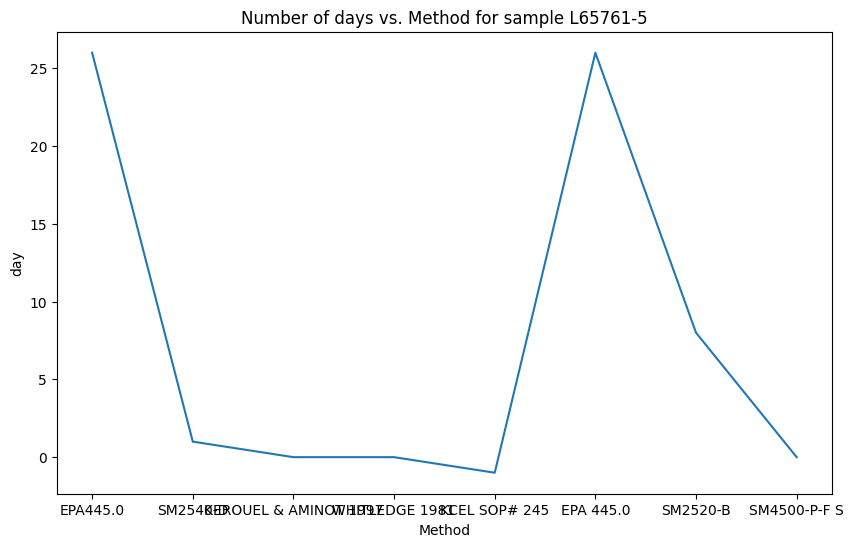

In [136]:
outlier_case = df_subset[df_subset['Sample Number']=='L65761-5']
plt.figure(figsize=(10, 6))
plt.plot(outlier_case['Method'], outlier_case['day'])
plt.title('Number of days vs. Method for sample L65761-5')
plt.xlabel('Method')
plt.ylabel('day')
plt.show()

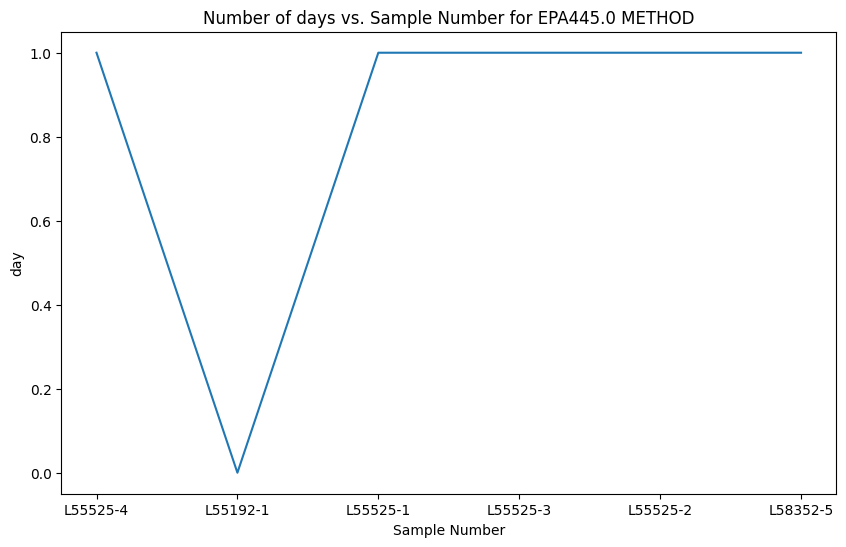

In [135]:
outlier_case = df_subset[df_subset['Sample Number']=='L65761-5']
plt.figure(figsize=(10, 6))
plt.plot(less_than_5['Sample Number'], less_than_5['day'])
plt.title('Number of days vs. Sample Number for EPA445.0 METHOD')
plt.xlabel('Sample Number')
plt.ylabel('day')
plt.show()

In [110]:
df_subset[df_subset['day']>20]

,Unnamed: 0,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,...,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source,Time_difference,Normalised_value(mg/L),day
3,5,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.0,Marine Offshore,Central Puget Sound,MSWH01,...,ug/L,1,0.26,0.522,EPA445.0,08/15/2016,KCEL,26 days 15:30:00,0.000510,26
43,81,2046,2046.0,536,L64990-21,04/05/2016 10:38:00 AM,179.0,Marine Offshore,Central Puget Sound,LSNT01,...,PSS,1,2.00,3.000,SM2520-B,04/28/2016,KCEL,22 days 13:22:00,0.029000,22
45,83,4430,4430.0,1025,L66035-4,09/20/2016 08:25:00 AM,34.9,Marine Offshore,Central Puget Sound,LSEP01,...,ug/L,1,0.10,0.200,EPA445.0,10/14/2016,KCEL,23 days 15:35:00,0.000397,23
67,120,3140,3140.0,948,L65359-27,06/06/2016 11:53:00 AM,15.8,Marine Offshore,Central Puget Sound,LTBC43,...,ug/L,1,0.23,0.460,EPA445.0,07/01/2016,KCEL,24 days 12:07:00,0.000991,24
72,132,3128,3128.0,956,L65484-28,06/20/2016 01:09:00 PM,1.3,Marine Offshore,Central Puget Sound,LTED04,...,ug/L,1,0.67,1.340,EPA445.0,07/18/2016,KCEL,27 days 10:51:00,0.001790,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402493,1810231,213358,213358.0,85619,L80983-32,02/23/2023 11:30:00 AM,25.0,Marine Offshore,Central Puget Sound,NSEX01,...,ug/L,1,0.10,0.400,EPA445.0,03/20/2023,KCEL,24 days 12:30:00,0.000370,24
402695,1810562,218187,218187.0,86678,L81997-26,08/08/2023 11:41:00 AM,25.2,Marine Offshore,Central Puget Sound,MSJN02,...,ug/L,1,0.05,0.200,EPA 445.0,08/31/2023,KCEL,22 days 12:19:00,0.000941,22
402795,1810764,218294,218294.0,86690,L81997-30,08/08/2023 12:23:00 PM,5.2,Marine Offshore,Central Puget Sound,NSEX01,...,ug/L,1,0.52,2.090,EPA445.0,08/31/2023,KCEL,22 days 11:37:00,0.001100,22
402801,1810775,221009,221009.0,87396,L82905-23,12/04/2023 10:33:00 AM,1.0,Marine Offshore,Central Puget Sound,KSSK02,...,mg/L,1,0.05,0.200,SM4500-N-C S,12/27/2023,KCEL,22 days 13:27:00,0.460000,22


In [100]:
df_subset[df_subset['Units']=='PSS']['Time_difference']

1          9 days 10:38:00
8          2 days 12:18:00
43        22 days 13:22:00
172        8 days 12:26:00
206        9 days 14:35:00
                ...       
402494     2 days 13:41:00
402577     2 days 13:51:00
402625     2 days 14:47:00
402789     3 days 11:12:00
402819    15 days 14:33:00
Name: Time_difference, Length: 6106, dtype: object

In [97]:
df_subset[df_subset['Parameter']=='Dissolved Oxygen, Field']['Units'].value_counts()

mg/L    45791
Name: Units, dtype: int64

In [91]:
df_light['Site Type'].value_counts()

Large Lakes    4143
Name: Site Type, dtype: int64

In [81]:
df_subset['Site Type'].value_counts()

Large Lakes        202519
Marine Offshore    200364
Name: Site Type, dtype: int64

In [83]:
df_light['Site Type'].value_counts()

Large Lakes    4143
Name: Site Type, dtype: int64

In [30]:
df_ksb = df_light[df_light['Locator']=='KSBP01']

In [33]:
df_ksb['Sample Number'].value_counts()

L64989-11    1
L58827-1     1
L76307-14    1
L78847-12    1
L57452-13    1
            ..
L67694-14    1
L62262-12    1
L67815-10    1
L70461-6     1
L82523-12    1
Name: Sample Number, Length: 2008, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

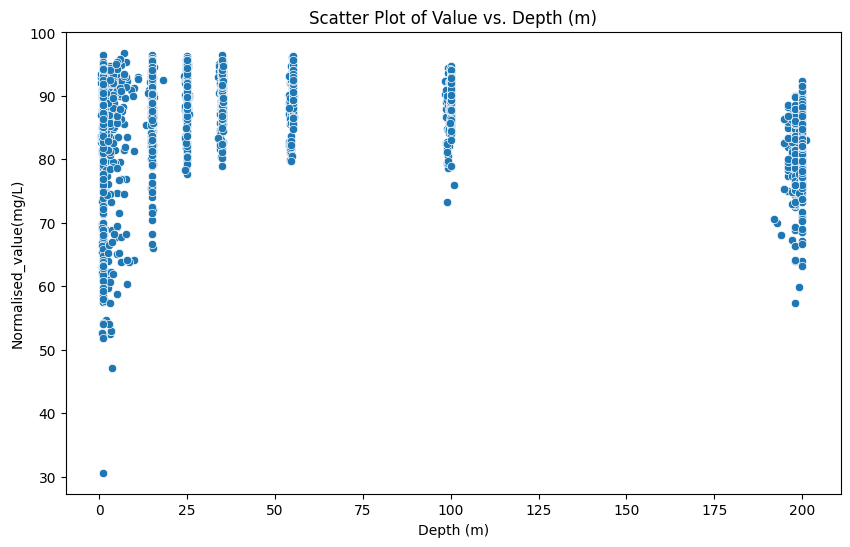

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depth (m)', y='Normalised_value(mg/L)', data=df_ksb)
plt.title('Scatter Plot of Value vs. Depth (m)')
plt.xlabel('Depth (m)')
plt.ylabel('Normalised_value(mg/L)')
plt.show()

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Data mining/project/Water_Quality.csv')

<ipython-input-6-27381d76e48c>:1: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data mining/project/Water_Quality.csv')


In [7]:
df['Site Type'].value_counts()

Large Lakes                   885057
Streams and Rivers            485052
Marine Offshore               382795
Marine Intertidal              56553
Freshwater - Uncategorized      1261
Swimming Beaches                 206
Name: Site Type, dtype: int64

In [4]:
df

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
0,2244,2244.0,22,L63668-18,09/21/2015 10:29:00 AM,54.20,Marine Offshore,Central Puget Sound,JSUR01,Point Wells,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,09/21/2015,KCEL
1,2531,2531.0,329,L63001-3,06/17/2015 10:43:00 AM,1.00,Marine Offshore,Central Puget Sound,NSAJ02,Dockton Park,...,0.05,0.10,NaN,NaN,NaN,NaN,NaN,WHITLEDGE 1981,06/18/2015,KCEL
2,3034,3034.0,818,L65361-20,06/07/2016 10:13:00 AM,178.00,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,06/07/2016,KCEL
3,4609,4609.0,1263,L65931-3,08/15/2016 01:22:00 PM,1.50,Marine Offshore,Central Puget Sound,LTUM03,Duwamish River - South Park Bridge,...,2.00,3.00,NaN,NaN,NaN,NaN,NaN,SM2520-B,08/25/2016,KCEL
4,2747,2747.0,58,L62666-12,05/18/2015 09:22:00 AM,196.00,Marine Offshore,Central Puget Sound,KSBP01,Jefferson Head,...,0.06,0.12,NaN,NaN,NaN,NaN,NaN,CTD,05/18/2015,KCEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810919,219799,219799.0,87013,L82640-21,11/01/2023 01:27:00 PM,100.00,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,...,0.05,0.20,NaN,NaN,NaN,NaN,NaN,WHITLEDGE 1981,11/03/2023,KCEL
1810920,221026,221026.0,87402,L83134-5,12/27/2023 10:30:00 AM,2.00,Large Lakes,Lake Union/Ship Canal,A522,Lake Union near west shore,...,0.50,1.00,NaN,NaN,NaN,NaN,NaN,KCEL SOP# 245,12/27/2023,KCEL
1810921,218353,218353.0,86724,L81814-20,07/05/2023 11:41:00 AM,55.10,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTD,07/05/2023,KCEL
1810922,218115,218115.0,86703,L82077-1,08/22/2023 07:53:00 AM,0.96,Marine Offshore,Central Puget Sound,LSEP01,South Plant Outfall,...,0.05,0.20,NaN,NaN,NaN,NaN,NaN,WHITLEDGE 1981,08/24/2023,KCEL


In [5]:
df.isna().sum()

Sample ID                 0
Grab ID              438602
Profile ID                0
Sample Number             0
Collect DateTime          0
Depth (m)            438602
Site Type                 0
Area                   1261
Locator                   0
Site                      0
Parameter                 0
Value                158578
Units                   804
QualityId                 0
Lab Qualifier       1565283
MDL                  835498
RDL                  848603
Text Value          1573104
Sample Info         1800682
Steward Note        1808708
Replicates          1807300
Replicate Of        1807409
Method               191663
Date Analyzed        747882
Data Source               0
dtype: int64

In [8]:
columns_to_be_dropped = ['Lab Qualifier','Text Value','Sample Info','Steward Note','Replicates','Replicate Of']

In [9]:
df.drop(columns_to_be_dropped, axis=1, inplace=True)

In [11]:
df.isna().sum()

Sample ID                0
Grab ID             438602
Profile ID               0
Sample Number            0
Collect DateTime         0
Depth (m)           438602
Site Type                0
Area                  1261
Locator                  0
Site                     0
Parameter                0
Value               158578
Units                  804
QualityId                0
MDL                 835498
RDL                 848603
Method              191663
Date Analyzed       747882
Data Source              0
dtype: int64

In [12]:
filtered_df = df[df[['Grab ID', 'Depth (m)', 'Area','Value','Units','MDL','RDL','Method','Date Analyzed']].notnull().all(1)]

In [13]:
filtered_df

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,Parameter,Value,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source
1,2531,2531.0,329,L63001-3,06/17/2015 10:43:00 AM,1.00,Marine Offshore,Central Puget Sound,NSAJ02,Dockton Park,Silica,0.951,mg/L,1,0.05,0.100,WHITLEDGE 1981,06/18/2015,KCEL
3,4609,4609.0,1263,L65931-3,08/15/2016 01:22:00 PM,1.50,Marine Offshore,Central Puget Sound,LTUM03,Duwamish River - South Park Bridge,Salinity,17.900,PSS,1,2.00,3.000,SM2520-B,08/25/2016,KCEL
4,2747,2747.0,58,L62666-12,05/18/2015 09:22:00 AM,196.00,Marine Offshore,Central Puget Sound,KSBP01,Jefferson Head,"Chlorophyll, Field",0.750,ug/L,1,0.06,0.120,CTD,05/18/2015,KCEL
5,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.00,Marine Offshore,Central Puget Sound,MSWH01,Quartermaster Harbor Yacht Club,Pheophytin a,0.510,ug/L,1,0.26,0.522,EPA445.0,08/15/2016,KCEL
7,6189,6189.0,2362,L59977-3,04/22/2014 10:37:00 AM,6.70,Marine Offshore,Central Puget Sound,LTUM03,Duwamish River - South Park Bridge,Dissolved Oxygen,9.100,mg/L,1,0.10,0.500,SM4500-O-C,04/23/2014,KCEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810918,220987,220987.0,87401,L82905-17,12/04/2023 09:39:00 AM,15.00,Marine Offshore,Central Puget Sound,JSUR01,Point Wells,Silica,2.780,mg/L,1,0.05,0.200,WHITLEDGE 1981,12/05/2023,KCEL
1810919,219799,219799.0,87013,L82640-21,11/01/2023 01:27:00 PM,100.00,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,Silica,2.470,mg/L,1,0.05,0.200,WHITLEDGE 1981,11/03/2023,KCEL
1810920,221026,221026.0,87402,L83134-5,12/27/2023 10:30:00 AM,2.00,Large Lakes,Lake Union/Ship Canal,A522,Lake Union near west shore,"Dissolved Oxygen, Field",10.100,mg/L,1,0.50,1.000,KCEL SOP# 245,12/27/2023,KCEL
1810922,218115,218115.0,86703,L82077-1,08/22/2023 07:53:00 AM,0.96,Marine Offshore,Central Puget Sound,LSEP01,South Plant Outfall,Silica,2.040,mg/L,1,0.05,0.200,WHITLEDGE 1981,08/24/2023,KCEL


In [14]:
filtered_df.isna().sum()

Sample ID           0
Grab ID             0
Profile ID          0
Sample Number       0
Collect DateTime    0
Depth (m)           0
Site Type           0
Area                0
Locator             0
Site                0
Parameter           0
Value               0
Units               0
QualityId           0
MDL                 0
RDL                 0
Method              0
Date Analyzed       0
Data Source         0
dtype: int64

In [15]:


filtered_df['Area'].value_counts()

Central Puget Sound      200364
Lake Washington          130403
Lake Sammamish            72116
Lake Union/Ship Canal     44213
Whidbey                    5532
Sammamish                  1133
Duwamish                    103
Juanita                       2
Lewis                         1
Name: Area, dtype: int64

In [36]:
Areas_tobe_Analysed = ['Central Puget Sound','Lake Washington','Lake Sammamish']
subset_df = filtered_df[filtered_df['Area'].isin(Areas_tobe_Analysed)]

In [37]:
subset_df

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,Parameter,Value,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source
1,2531,2531.0,329,L63001-3,06/17/2015 10:43:00 AM,1.00,Marine Offshore,Central Puget Sound,NSAJ02,Dockton Park,Silica,0.9510,mg/L,1,0.050,0.100,WHITLEDGE 1981,06/18/2015,KCEL
3,4609,4609.0,1263,L65931-3,08/15/2016 01:22:00 PM,1.50,Marine Offshore,Central Puget Sound,LTUM03,Duwamish River - South Park Bridge,Salinity,17.9000,PSS,1,2.000,3.000,SM2520-B,08/25/2016,KCEL
4,2747,2747.0,58,L62666-12,05/18/2015 09:22:00 AM,196.00,Marine Offshore,Central Puget Sound,KSBP01,Jefferson Head,"Chlorophyll, Field",0.7500,ug/L,1,0.060,0.120,CTD,05/18/2015,KCEL
5,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.00,Marine Offshore,Central Puget Sound,MSWH01,Quartermaster Harbor Yacht Club,Pheophytin a,0.5100,ug/L,1,0.260,0.522,EPA445.0,08/15/2016,KCEL
7,6189,6189.0,2362,L59977-3,04/22/2014 10:37:00 AM,6.70,Marine Offshore,Central Puget Sound,LTUM03,Duwamish River - South Park Bridge,Dissolved Oxygen,9.1000,mg/L,1,0.100,0.500,SM4500-O-C,04/23/2014,KCEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810917,218406,218406.0,86724,L81814-17,07/05/2023 11:46:00 AM,15.10,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,Orthophosphate Phosphorus,0.0577,mg/L,1,0.005,0.010,SM4500-P-F S,07/06/2023,KCEL
1810918,220987,220987.0,87401,L82905-17,12/04/2023 09:39:00 AM,15.00,Marine Offshore,Central Puget Sound,JSUR01,Point Wells,Silica,2.7800,mg/L,1,0.050,0.200,WHITLEDGE 1981,12/05/2023,KCEL
1810919,219799,219799.0,87013,L82640-21,11/01/2023 01:27:00 PM,100.00,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,Silica,2.4700,mg/L,1,0.050,0.200,WHITLEDGE 1981,11/03/2023,KCEL
1810922,218115,218115.0,86703,L82077-1,08/22/2023 07:53:00 AM,0.96,Marine Offshore,Central Puget Sound,LSEP01,South Plant Outfall,Silica,2.0400,mg/L,1,0.050,0.200,WHITLEDGE 1981,08/24/2023,KCEL


In [ ]:
subset_df

In [23]:
subset_df['Sample Number'].value_counts()


L59635-9     12
L63864-1     12
L60766-31    12
L62329-12    12
L63124-2     12
             ..
L34911-92     1
L35420-70     1
L61162-10     1
L61162-7      1
L35190-91     1
Name: Sample Number, Length: 24784, dtype: int64

In [38]:
# dt_obj_collected = subset_df['Collect DateTime'].to_datetime()
dt_obj_collected = pd.to_datetime(subset_df['Collect DateTime'])

In [39]:
dt_obj_collected

1         2015-06-17 10:43:00
3         2016-08-15 13:22:00
4         2015-05-18 09:22:00
5         2016-07-19 08:30:00
7         2014-04-22 10:37:00
                  ...        
1810917   2023-07-05 11:46:00
1810918   2023-12-04 09:39:00
1810919   2023-11-01 13:27:00
1810922   2023-08-22 07:53:00
1810923   2023-02-08 08:06:00
Name: Collect DateTime, Length: 402883, dtype: datetime64[ns]

In [40]:
dt_obj_Analyzed = pd.to_datetime(subset_df['Date Analyzed'])

In [41]:
dt_obj_Analyzed

1         2015-06-18
3         2016-08-25
4         2015-05-18
5         2016-08-15
7         2014-04-23
             ...    
1810917   2023-07-06
1810918   2023-12-05
1810919   2023-11-03
1810922   2023-08-24
1810923   2023-02-08
Name: Date Analyzed, Length: 402883, dtype: datetime64[ns]

In [42]:
dt_obj_Analyzed

1         2015-06-18
3         2016-08-25
4         2015-05-18
5         2016-08-15
7         2014-04-23
             ...    
1810917   2023-07-06
1810918   2023-12-05
1810919   2023-11-03
1810922   2023-08-24
1810923   2023-02-08
Name: Date Analyzed, Length: 402883, dtype: datetime64[ns]

In [43]:
difference = dt_obj_Analyzed - dt_obj_collected

In [44]:
difference

1           0 days 13:17:00
3           9 days 10:38:00
4         -1 days +14:38:00
5          26 days 15:30:00
7           0 days 13:23:00
                 ...       
1810917     0 days 12:14:00
1810918     0 days 14:21:00
1810919     1 days 10:33:00
1810922     1 days 16:07:00
1810923   -1 days +15:54:00
Length: 402883, dtype: timedelta64[ns]

In [45]:
subset_df['Time_difference'] = difference

<ipython-input-45-5940418605fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Time_difference'] = difference


In [14]:
subset_df['Depth (m)'].value_counts()

NameError: name 'subset_df' is not defined

In [46]:
subset_df

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,Parameter,Value,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source,Time_difference
1,2531,2531.0,329,L63001-3,06/17/2015 10:43:00 AM,1.00,Marine Offshore,Central Puget Sound,NSAJ02,Dockton Park,Silica,0.9510,mg/L,1,0.050,0.100,WHITLEDGE 1981,06/18/2015,KCEL,0 days 13:17:00
3,4609,4609.0,1263,L65931-3,08/15/2016 01:22:00 PM,1.50,Marine Offshore,Central Puget Sound,LTUM03,Duwamish River - South Park Bridge,Salinity,17.9000,PSS,1,2.000,3.000,SM2520-B,08/25/2016,KCEL,9 days 10:38:00
4,2747,2747.0,58,L62666-12,05/18/2015 09:22:00 AM,196.00,Marine Offshore,Central Puget Sound,KSBP01,Jefferson Head,"Chlorophyll, Field",0.7500,ug/L,1,0.060,0.120,CTD,05/18/2015,KCEL,-1 days +14:38:00
5,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.00,Marine Offshore,Central Puget Sound,MSWH01,Quartermaster Harbor Yacht Club,Pheophytin a,0.5100,ug/L,1,0.260,0.522,EPA445.0,08/15/2016,KCEL,26 days 15:30:00
7,6189,6189.0,2362,L59977-3,04/22/2014 10:37:00 AM,6.70,Marine Offshore,Central Puget Sound,LTUM03,Duwamish River - South Park Bridge,Dissolved Oxygen,9.1000,mg/L,1,0.100,0.500,SM4500-O-C,04/23/2014,KCEL,0 days 13:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810917,218406,218406.0,86724,L81814-17,07/05/2023 11:46:00 AM,15.10,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,Orthophosphate Phosphorus,0.0577,mg/L,1,0.005,0.010,SM4500-P-F S,07/06/2023,KCEL,0 days 12:14:00
1810918,220987,220987.0,87401,L82905-17,12/04/2023 09:39:00 AM,15.00,Marine Offshore,Central Puget Sound,JSUR01,Point Wells,Silica,2.7800,mg/L,1,0.050,0.200,WHITLEDGE 1981,12/05/2023,KCEL,0 days 14:21:00
1810919,219799,219799.0,87013,L82640-21,11/01/2023 01:27:00 PM,100.00,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,Silica,2.4700,mg/L,1,0.050,0.200,WHITLEDGE 1981,11/03/2023,KCEL,1 days 10:33:00
1810922,218115,218115.0,86703,L82077-1,08/22/2023 07:53:00 AM,0.96,Marine Offshore,Central Puget Sound,LSEP01,South Plant Outfall,Silica,2.0400,mg/L,1,0.050,0.200,WHITLEDGE 1981,08/24/2023,KCEL,1 days 16:07:00


In [47]:
subset_df['Units'].value_counts()

mg/L          252511
ug/L           76849
umhos/cm       29609
% light        16370
mg CaCO3/L      9134
NTU             7810
PSS             6106
%               4143
mg/m3            351
Name: Units, dtype: int64

In [49]:
def normalize_to_mg_per_l(parameter_type, value):
    # Dictionary mapping parameter types to conversion factors
    conversion_factors = {
            "mg/L": 1,
            "ug/L": 0.001,
            "umhos/cm": 0.5,
            "% light": None,  # No conversion provided
            "mg CaCO3/L": 1/100.09,
            "NTU": 1,
            "PSS": 1/1000,
            "%": None,  # No conversion provided
            "mg/m3": 1/1000
        }
    if parameter_type in conversion_factors:
        conversion_factor = conversion_factors[parameter_type]
        if conversion_factor is not None:
            # If conversion factor is provided, apply it
            normalized_value = value * conversion_factor
        else:
            # No conversion factor provided, return value as is
            normalized_value = value
        return normalized_value
    else:
        # If parameter type is not recognized, return None
        return None

subset_df["Normalised_value(mg/L)"] = subset_df.apply(lambda x: normalize_to_mg_per_l(x["Units"], x["Value"]), axis=1)

<ipython-input-49-b0481415ece8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["Normalised_value(mg/L)"] = subset_df.apply(lambda x: normalize_to_mg_per_l(x["Units"], x["Value"]), axis=1)


In [50]:
subset_df

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,Value,Units,QualityId,MDL,RDL,Method,Date Analyzed,Data Source,Time_difference,Normalised_value(mg/L)
1,2531,2531.0,329,L63001-3,06/17/2015 10:43:00 AM,1.00,Marine Offshore,Central Puget Sound,NSAJ02,Dockton Park,...,0.9510,mg/L,1,0.050,0.100,WHITLEDGE 1981,06/18/2015,KCEL,0 days 13:17:00,0.95100
3,4609,4609.0,1263,L65931-3,08/15/2016 01:22:00 PM,1.50,Marine Offshore,Central Puget Sound,LTUM03,Duwamish River - South Park Bridge,...,17.9000,PSS,1,2.000,3.000,SM2520-B,08/25/2016,KCEL,9 days 10:38:00,0.01790
4,2747,2747.0,58,L62666-12,05/18/2015 09:22:00 AM,196.00,Marine Offshore,Central Puget Sound,KSBP01,Jefferson Head,...,0.7500,ug/L,1,0.060,0.120,CTD,05/18/2015,KCEL,-1 days +14:38:00,0.00075
5,4722,4714.0,1253,L65761-5,07/19/2016 08:30:00 AM,1.00,Marine Offshore,Central Puget Sound,MSWH01,Quartermaster Harbor Yacht Club,...,0.5100,ug/L,1,0.260,0.522,EPA445.0,08/15/2016,KCEL,26 days 15:30:00,0.00051
7,6189,6189.0,2362,L59977-3,04/22/2014 10:37:00 AM,6.70,Marine Offshore,Central Puget Sound,LTUM03,Duwamish River - South Park Bridge,...,9.1000,mg/L,1,0.100,0.500,SM4500-O-C,04/23/2014,KCEL,0 days 13:23:00,9.10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810917,218406,218406.0,86724,L81814-17,07/05/2023 11:46:00 AM,15.10,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,...,0.0577,mg/L,1,0.005,0.010,SM4500-P-F S,07/06/2023,KCEL,0 days 12:14:00,0.05770
1810918,220987,220987.0,87401,L82905-17,12/04/2023 09:39:00 AM,15.00,Marine Offshore,Central Puget Sound,JSUR01,Point Wells,...,2.7800,mg/L,1,0.050,0.200,WHITLEDGE 1981,12/05/2023,KCEL,0 days 14:21:00,2.78000
1810919,219799,219799.0,87013,L82640-21,11/01/2023 01:27:00 PM,100.00,Marine Offshore,Central Puget Sound,LSNT01,Point Williams,...,2.4700,mg/L,1,0.050,0.200,WHITLEDGE 1981,11/03/2023,KCEL,1 days 10:33:00,2.47000
1810922,218115,218115.0,86703,L82077-1,08/22/2023 07:53:00 AM,0.96,Marine Offshore,Central Puget Sound,LSEP01,South Plant Outfall,...,2.0400,mg/L,1,0.050,0.200,WHITLEDGE 1981,08/24/2023,KCEL,1 days 16:07:00,2.04000


In [52]:
subset_df.to_csv('/content/drive/MyDrive/Data mining/project/Subset_for_first_presentation.csv')

In [ ]:
Areas_tobe_Analysed = ['Central Puget Sound','Lake Washington','Lake Sammamish']
subset_df[subset_df['Area']].to_csv